## Using Regression or Classification

Predicting Stock market price for Tesla, as the data is not clustered the only way to predict the trends is through regression.


Regression finds the correleations between the variables and predict the continous output.


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score

import datetime as dt 


%matplotlib inline


In [3]:
#Importing data from Github

url = "https://raw.githubusercontent.com/s356291/DAVE3625/main/TSLA.csv"
df = pd.read_csv(url, sep=',')


# Checking to see the lines
df.tail()



,Date,Open,High,Low,Close,Adj Close,Volume
2840,2021-10-08,796.210022,796.380005,780.909973,785.489990,785.489990,16711100
2841,2021-10-11,787.650024,801.239990,785.500000,791.940002,791.940002,14200300
2842,2021-10-12,800.929993,812.320007,796.570007,805.719971,805.719971,22020000
2843,2021-10-13,810.469971,815.409973,805.780029,811.080017,811.080017,14120100
2844,2021-10-14,815.489990,820.250000,813.349976,818.320007,818.320007,12203200


<Axes: >

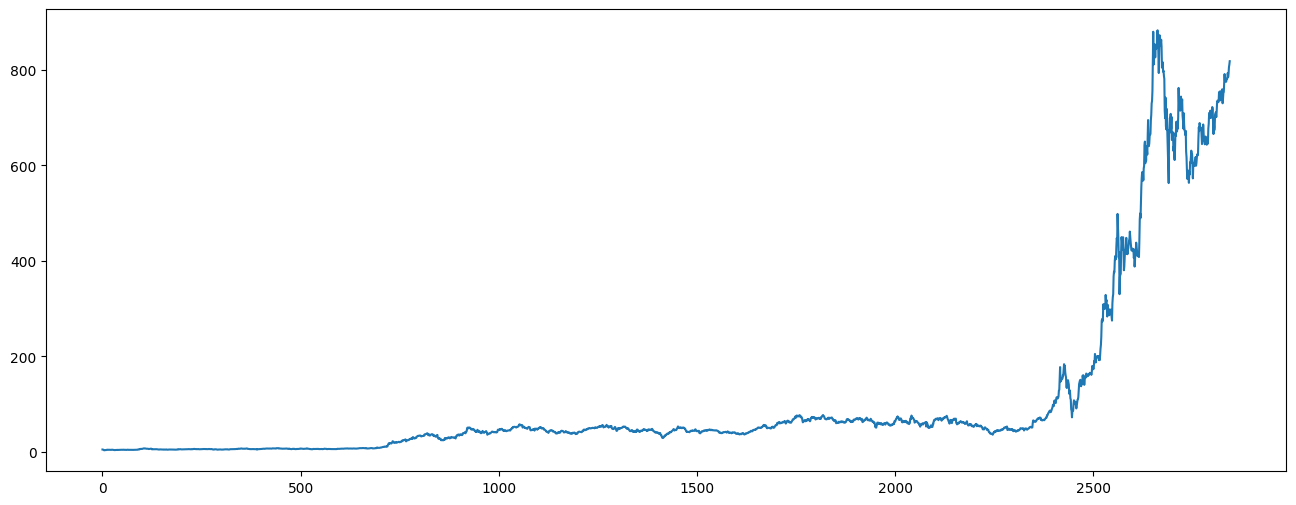

In [4]:
df['Close'].plot(figsize=(16,6))

In [5]:
# Checks dataset for null values

df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
df["Date"] = df['Date'].astype(str)
df["Date"] = df['Date'].str.replace("-", "")
df = df.astype({"Date": int, "Close": float})

In [7]:
# Data splitting
x = df['Date'].values
y = df['Close'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)



In [8]:
print(df['Date'].head())
print(df['Date'].tail())


0    20100629
1    20100630
2    20100701
3    20100702
4    20100706
Name: Date, dtype: int32
2840    20211008
2841    20211011
2842    20211012
2843    20211013
2844    20211014
Name: Date, dtype: int32


In [9]:
x = df['Date'].values.reshape(-1, 1)

In [10]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [11]:
# Make predictions
x_test_reshaped=x_test.reshape(-1, 1)
y_pred = model.predict(x_test_reshaped)


In [12]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

Mean Squared Error: 21890.922800113636
R2 Score: 0.4350476919601173


In [19]:
import matplotlib.dates as mdates

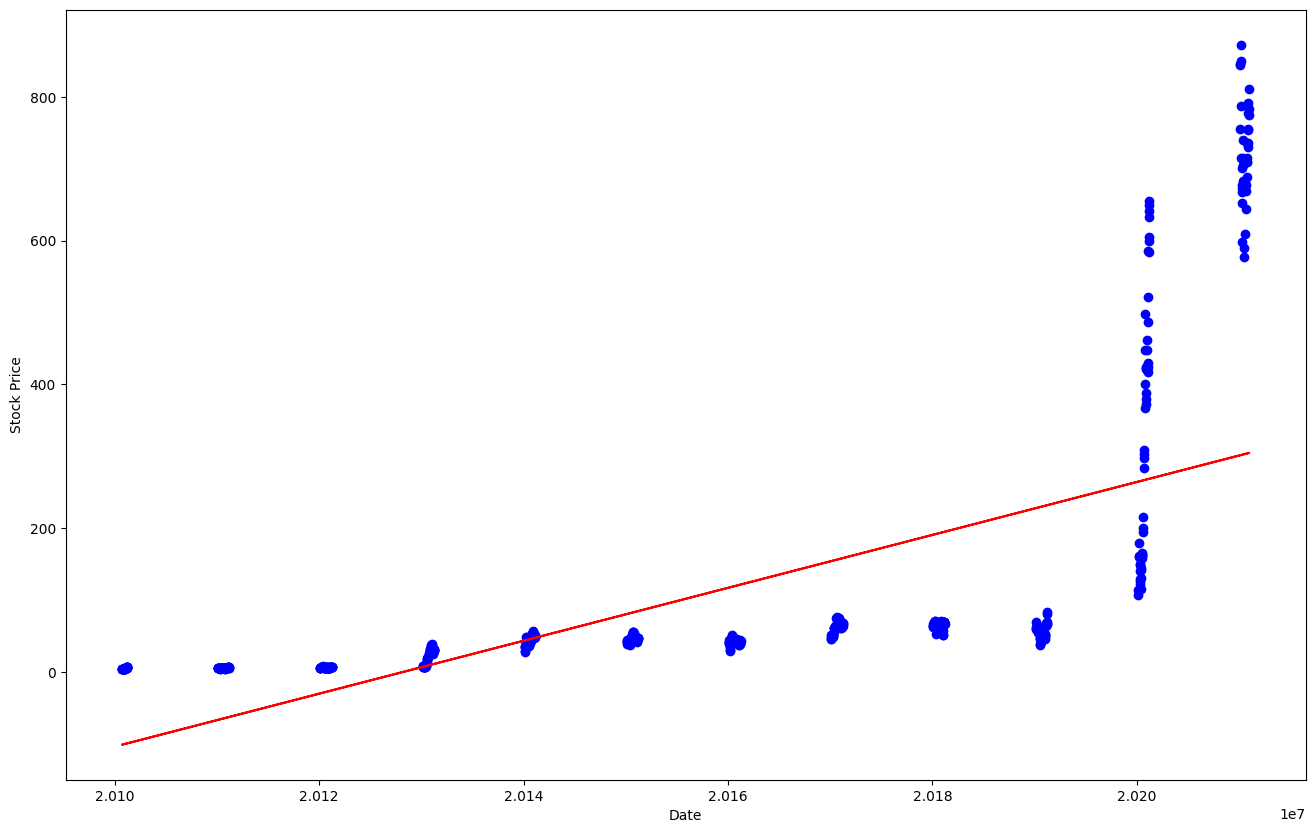

In [29]:
# Changed the plot to be more accurate

plt.figure(figsize=(16,10))
plt.scatter(x_test_reshaped, y_test, color='blue', label='Actual')
plt.plot(x_test_reshaped, y_pred, color='red', label='Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')

plt.show()

In [81]:
### Now we check the predicted dates [YYYYMMDD]


In [82]:
model.predict([[20240101]])

array([411.82581084])